In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [21]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [22]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [8]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [9]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [10]:
predictions[0:5]

array([239.83873343, 118.22275477, 152.38262188, 120.61247938,
       140.83959988])

Text(0, 0.5, 'Predictions')

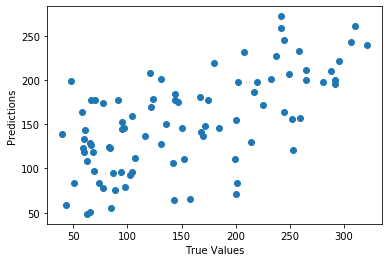

In [11]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [12]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 61.53847528787885
Train RMSE: 51.34692620237069


# Cross Validation

In [13]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [14]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [15]:
lm = linear_model.LinearRegression()
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    print("RMSE:", np.sqrt(mean_squared_error(y_test,predictions)))

TRAIN: [2 3] TEST: [0 1]
RMSE: 2.0
TRAIN: [0 1] TEST: [2 3]
RMSE: 1.9999999999999998


In [16]:
X_test

array([[1, 2],
       [3, 4]])

### LOOCV

In [17]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [18]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [23]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


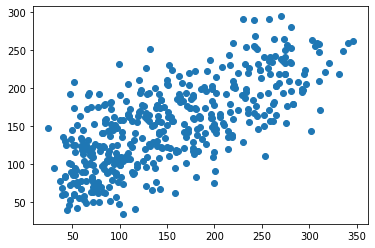

In [43]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [44]:
predictions

array([204.74116867,  66.83256782, 175.60492163, 165.82131555,
       128.83457511, 103.05913006,  77.50532134, 125.41897877,
       161.76534891, 209.5903942 ,  98.5866784 , 102.25391983,
       114.3072534 , 161.82165714, 100.50073703, 176.55193264,
       206.59118368, 184.3577636 , 147.82727722, 121.98438237,
       119.6409081 ,  89.72660898, 117.35311756, 251.99153125,
       164.01794205, 146.8714022 ,  95.41577967, 178.88367056,
       127.20395689, 179.54810126, 159.81822573,  67.84440925,
       259.65876453, 105.56967912,  78.43441365,  83.11721913,
       203.10947232, 154.06508322, 240.73979433, 137.18048859,
       158.32510156,  72.81647497, 145.48464826,  78.96090116,
       218.96414895, 125.73533137, 141.31322446, 107.95054173,
        72.54328656, 192.8483576 , 157.23952998, 171.00497069,
       134.05940748, 158.09263799, 139.09864269,  71.7115061 ,
       208.28948411,  77.67427519, 102.08430196, 135.69822265,
       113.420112  , 184.40319269,  61.37326553,  96.75

In [45]:
np.sqrt(mean_squared_error(y,predictions))

54.76342105528678

# tasks 

##### Find out cross validation results without using cross_val_predict

In [24]:
# your code here
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
#diabetes.data
#type(diabetes.data)
diabetes.data.shape

(442, 10)

In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
lm = linear_model.LinearRegression()
RMSE_test_data = list()
RMSE_train_data = list()
for train_index, test_index in kf.split(df):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = diabetes.data[train_index], diabetes.data[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    RMSE_test_data.append(np.sqrt(mean_squared_error(y_test,predictions)))
    RMSE_train_data.append(np.sqrt(mean_squared_error(y_train,lm.predict(X_train))))
   # print("RMSE for test data:", np.sqrt(mean_squared_error(y_test,predictions)))
   # print("RMSE for train data:", np.sqrt(mean_squared_error(y_train,lm.predict(X_train))))
print("Average RMSE for test data is:",sum(RMSE_test_data)/len(RMSE_test_data))
print("Average RMSE for train data is:",sum(RMSE_train_data)/len(RMSE_train_data))

Average RMSE for test data is: 54.40461553640235
Average RMSE for train data is: 53.404791483956465


##### Implement cross validation without using sklearn at all

In [26]:
# your code here
import math
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
for i in range(5): #5 masi em bajanel
    X_test = df[math.floor(i*len(df)/5) : math.floor((i+1)*len(df)/5)]
    X_train = pd.concat([df[0:i*math.floor(len(df)/5)],df[math.floor((i+1)*len(df)/5):]])
    y_test = y[math.floor(i*len(y)/5) : math.floor((i+1)*len(y)/5)]
    y_train = np.concatenate((y[0:i*math.floor(len(df)/5)], y[math.floor((i+1)*len(df)/5):]), axis=0)
    #!!!QUESTION!!!! - ka inch vor dzev vor miangamic im dataframeic hanem X_testy u mnacacy lini Y_test voch te indexneri het xaghalov?
    model = lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    RMSE_test_data.append(np.sqrt(mean_squared_error(y_test,predictions)))
    RMSE_train_data.append(np.sqrt(mean_squared_error(y_train,lm.predict(X_train))))
   # print("RMSE for test data:", np.sqrt(mean_squared_error(y_test,predictions)))
   # print("RMSE for train data:", np.sqrt(mean_squared_error(y_train,lm.predict(X_train))))
print("Average RMSE for test data is:",sum(RMSE_test_data)/len(RMSE_test_data))
print("Average RMSE for train data is:",sum(RMSE_train_data)/len(RMSE_train_data))    

Average RMSE for test data is: 54.51681156636358
Average RMSE for train data is: 53.39035446368211


# Feature Scaling

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('data/regression.csv') 
data.head() 

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [27]:
y = data['Value']

In [28]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [29]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
X_train

,Age,Overall,Potential,Jersey Number
607,27,79,81,4.0
2241,32,74,74,25.0
8253,25,67,71,4.0
14553,23,60,67,55.0
4473,29,71,71,6.0
...,...,...,...,...
16313,20,57,73,12.0
15766,21,58,71,29.0
14702,19,60,72,32.0
11092,18,64,77,32.0


#### MinMaxScaler

In [40]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [41]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.275862,0.404255,0.489362,0.224490
1,0.620690,0.638298,0.617021,0.091837
2,0.482759,0.361702,0.340426,0.081633
3,0.620690,0.340426,0.319149,0.316327
4,0.068966,0.255319,0.638298,0.612245
...,...,...,...,...
14320,0.137931,0.340426,0.574468,0.204082
14321,0.206897,0.276596,0.404255,0.285714
14322,0.310345,0.340426,0.382979,0.295918
14323,0.551724,0.404255,0.382979,0.387755


In [42]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.620690,0.531915,0.510638,0.081633
1,0.275862,0.382979,0.446809,0.173469
2,0.551724,0.319149,0.297872,0.040816
3,0.482759,0.340426,0.319149,0.316327
4,0.448276,0.723404,0.702128,0.040816
...,...,...,...,...
3577,0.137931,0.085106,0.276596,0.193878
3578,0.275862,0.319149,0.404255,0.163265
3579,0.482759,0.404255,0.382979,0.132653
3580,0.275862,0.319149,0.468085,0.244898


### Standard Scaler

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train) 

In [45]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,-0.236209,-0.033135,-0.050022,0.198929
1,1.911760,1.561647,0.928901,-0.605291
2,1.052572,-0.323096,-1.192100,-0.667154
3,1.911760,-0.468076,-1.355254,0.755697
4,-1.524990,-1.047997,1.092055,2.549726
...,...,...,...,...
14320,-1.095397,-0.468076,0.602593,0.075203
14321,-0.665803,-0.903017,-0.702638,0.570108
14322,-0.021412,-0.468076,-0.865792,0.631971
14323,1.482166,-0.033135,-0.865792,1.188739


In [46]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,1.911760,0.836746,0.113131,-0.667154
1,-0.236209,-0.178116,-0.376330,-0.110386
2,1.482166,-0.613056,-1.518408,-0.914606
3,1.052572,-0.468076,-1.355254,0.755697
4,0.837775,2.141568,1.581517,-0.914606
...,...,...,...,...
3577,-1.095397,-2.207839,-1.681562,0.013340
3578,-0.236209,-0.613056,-0.702638,-0.172249
3579,1.052572,-0.033135,-0.865792,-0.357839
3580,-0.236209,-0.613056,-0.213176,0.322655


# tasks

###### try applying this scalers to any dataset and check the regression results

In [88]:
# your code here
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
data_commerce = pd.read_csv('data/Ecommerce.csv')
y = data_commerce['Yearly Amount Spent']
data_commerce.drop(['Email','Address','Avatar','Yearly Amount Spent'],axis = 1,inplace = True)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(data_commerce, y, test_size=0.2, random_state=42)
print(X_train)
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train) #kaskacum em vor chisht dzev e.
X_test = norm.transform(X_test)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))
print(X_train)

     Avg Session Length  Time on App  Time on Website  Length of Membership
249           33.780157    11.917636        36.844734              3.634996
433           34.278248    11.822722        36.308545              2.117383
19            32.617856    13.989593        37.190504              4.064549
322           33.264632    10.732131        36.145792              4.086566
332           33.144234    11.737041        37.935189              2.190132
..                  ...          ...              ...                   ...
106           32.291756    12.190474        36.152462              3.781823
270           34.006489    12.956277        38.655095              3.275734
348           31.812483    10.886921        34.897828              3.128639
435           32.259973    14.132893        37.023479              3.762070
102           32.425697    11.448902        37.580190              2.586968

[400 rows x 4 columns]
Test RMSE: 10.481590584636487
Train RMSE: 9.788898315370952
[[0.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(data_commerce, y, test_size=0.2, random_state=42)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))
#aranc MinMaxScaler i el lriv nuyn ardyunqy stacvec.

Test RMSE: 10.481590584636484
Train RMSE: 9.788898315370936


# One Hot Encoding

In [95]:
data = pd.read_csv('data/regression.csv')

In [96]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [49]:
pd.get_dummies(data[['Age','Club']])

,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17904,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17905,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# tasks

###### try applying this scalers to any column(s) and check the regression results

In [117]:
# your code here
df = pd.get_dummies(data[['Age','Club','Wage','Height','Weight','Position']])
y = data['Value']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))


Test RMSE: 1.3249729856198415e+18
Train RMSE: 2164152.707970857


In [112]:
# ինչի է train-ի վրա սենց մեծ սխալ՞

In [116]:
df = pd.get_dummies(data[['Age','Wage','Height','Weight']]) #position u club hanel em
y = data['Value']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train) #kaskacum em vor chisht dzev e.
X_test = norm.transform(X_test)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))


Test RMSE: 5.471227627325897e+16
Train RMSE: 2645415.7711498053


In [114]:
# թեստի սխալը մեծացավ